# Homework 2 (HW2)

---
By the end of this homework we expect you to be able to:
1. Preprocess data and make it amenable to statistical analysis and machine learning models;
2. Train and test out-of-the-box machine learning models in Python;
3. Carry out statistical hypothesis testing;
4. Carry out simple multivariate regression analyses;
5. Use techniques to control for covariates;
---

## Important Dates

- Homework release: Fri 6 Nov 2020
- **Homework due**: Fri 20 Nov 2020, 23:59
- Grade release: Mon 30 Nov 2020

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you have to justify your choice.
2. Make sure you use the data folder provided in the repository in **read-only** mode.
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation (in markdown).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master branch. If there are multiple notebooks present, we will **strictly** not grade anything.
7. Also, be sure to hand in a fully-run and evaluated notebook. We will not run your notebook for you, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. Make sure to print results or dataframes that confirm you have properly addressed the task.
9. Lastly, the grading is done in the *double blind* mode, i.e., the TAs grades an anonymized version of your notebook, so make sure that your notebook **neither has your team name nor the names of the members**.

## Context

Publishing papers is a big part of the lives of [Ph.D. students](http://phdcomics.com/comics/archive.php?comicid=154), [post-docs](http://phdcomics.com/comics/archive.php?comicid=1744) and [professors](http://phdcomics.com/comics/archive.php?comicid=1051). 
In Computer Science, publishing happens mostly in conferences. What follows is a slight simplification of how these conferences decide which papers to accept and which papers to reject.
 
Every year, scholars submit papers to prestigious conferences. The papers are then assigned to reviewers (usually around 3), who are other people from the same research community (respect thy neighbor!). Each reviewer weighs in on whether they believe the papers they were assigned are good or bad, and write a review, often along with a score (e.g. +3 Strong Accept, +2 Accept, +1 Weak Accept, 0 Borderline, …,  -3 Strong Reject). Then, in the end, "special" reviewers called, "Area Chairs" analyze all the reviews that were written for the same paper and decide what gets accepted and what gets rejected. Importantly, throughout this whole dance, reviewers and authors are anonymous. When you're reviewing a paper, you do not know who wrote it. And when you receive the review, you don't know who reviewed it. Because of that, we call this a double-blind reviewing process.

An interesting development that has evolved in recent years is the rise of pre-prints. In previous times, researchers often exposed their research to the world only after it had been peer-reviewed and published in a conference or a journal. But recently researchers are much keener to let their ideas out into the world as soon as possible, and they publish their research before it has been approved to any conference or journal, by posting the research on so-called pre-print servers. The most common pre-print server for Computer Science, Physics, and Maths is called [arXiv](https://arxiv.org/), for Biology, an increasingly popular one is [bioRxiv](https://www.biorxiv.org/), for Psychology [psyArXiv](https://psyarxiv.com/) (they are not very creative with the names). Notice that pre-prints and peer-review are not mutually exclusive, in fact, usually, you publish your pre-print, and then you try to publish your work in a peer-reviewed setting.

Overall, publishing pre-prints has many benefits. They make science more accessible and hasten the circulation of important results in the academic community. However, a big issue brought forth with pre-prints is that they often break the anonymity in the double-blind reviewing process. For instance, in machine learning, since most papers are published as pre-prints, it is often easy to figure out if the paper you are reviewing is from a famous researcher or a big company with prominent research scientists. From critics' viewpoint, knowing the authors of the papers you are reviewing can bias your reviews. If you know that a given author is famous, you'd be more inclined to take his or her word for granted. If the author is from an institution you’ve never heard about, you are more likely to doubt his or her findings.

In this homework, we will take a data-driven deep dive into the world of academic publishing. Can you use your freshly acquired data-science skills to predict which papers are going to make the cut? Are your data analysis skills sharp enough to figure out whether the aforementioned concerns about pre-print issues are justified?


## The data

The data, whose source has been *"double-blinded"* from you, and which has been simplified a bit for the assignment, contains information about submissions to a prestigious machine learning conference called ICLR (pronounced “I-clear”). You can find the dataframe in the git repo for the homework (`./data/dataset_final.csv`). We provide a brief description of the fields you will encounter.

- `year`: year the paper has been submitted to ICLR. Notice that we provide data for three years, 2018, 2019, and 2020.


- `paper`: title of the paper.


- `authors`: names of the authors separated by ;.


- `ratings`: mean rating given to the paper by the reviewers.


- `decisions`: either Accept if the paper was accepted, or Reject otherwise.


- `institution`: institutions for each of the authors, separated by ;.


- `csranking`: ranking of the institutions according to csrankings. The better the institution, the better the rank. Notice that, if a paper has more than 1 author, this field will contain multiple values, separated by ;. For institutions that are not in csrankings, the value will be -1.


- `categories`: topical categories of the paper. Each number corresponds to a different category: (1) Theory, (2) Computer Vision, (3) Natural Language Processing, (4) Adversarial ML, (5) Generative Modeling, (7) Fairness, (8) Generalization, (9) Optimization, (10) Graphs, (11) Bayesian Methods, (0) Others. A paper may belong to multiple categories, separated by ;.


- `authors_citations`: number of citations of each one of the authors, separated by ;.


- `authors_publications`: number of publications by each one of the authors, separated by ;.


- `authors_hindex`: h-index of each one of the authors, separated by ;. The h-index is an author-level metric that measures both the productivity and citation impact of the publications of a scientist or scholar. It is the maximum value $h$ such that the given author has published $h$ papers that have each been cited at least $h$ times.


- `arxiv`: whether the paper was spotted in a pre-print server around the submission period.

Also, notice that in this dataframe, when some piece of data was not available, -1 will be used as the value. For example, companies aren't a part of csrankings, so for people who work in big companies, the values are -1 in the field csranking.


In [1]:
## Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

from scipy.stats import ttest_ind

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import diagnostic

import networkx as nx

sns.set_style('whitegrid')
sns.set_palette('Set1')

plt.rcParams.update({'font.size': 14})

In [2]:
# custom bootstrap function, used throught the exercises
def bootstrap_CI(data, iterations=10000, a=0.05, func=np.nanmean):
    """
    Computes the CI of a statistic for some sample using bootstrapping.
    By default does a 95% CI and uses 10000 iterations, and the statistic that is computed is the mean of the data.
    Parameters:
    -----------
    data (array-like): the data sample
    iterations (int): number of iterations
    a (float): alpha of the CI, giving the percentiles [a/2 * 100, (1 - a/2) * 100]
    func (function): a function that computes the wanted statistic, applied to a resampling of `data` of same length
    
    Returns:
    --------
    list: the confidence interval 
    """
    stats = np.zeros(iterations)
    data = np.array(data)
    for i in range(iterations):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices]
        stats[i] = func(data_tmp)
    return [np.nanpercentile(stats, a/2*100),np.nanpercentile(stats, (1-a/2)*100)]

## _Step 1:_ Predicting paper ratings

The first part of this homework poses a simple question: Can you predict the ratings the paper will receive given attributes related to its authors? To answer this question, we will build an ML pipeline from scratch, preprocessing the data, training a regression model, and then evaluating it.


---

### Task 1.1

Some of the fields in the data are not very amenable to serve as input to traditional machine learning algorithms. Namely, we have some fields for which there are a varying number of values (e.g. papers with 3 authors will have 3 values in the `author_citations` field, papers with 5 authors will have 5).


Your first task is to perform some feature engineering and derive unique values for each paper which you will be able to use in your ML model. 
More specifically, you must:

1. Create 3 new fields in the dataframe corresponding to the median value of the number of citations per author, the number of publications per author, and the h-index per author. So for instance, for the row `authors_publications`, you will create an additional column, e.g. `authors_publications_median`, containing the median number of publications per author in each paper.
2. Create another field entitled `reputation` capturing how famous the last author of the paper is. Notice that the last author of the paper is usually the most senior person involved in the project. This field should equal $\log_{10}\Big(\frac{\#citations}{\#publications} + 1\Big)$. Notice that each author in the dataset has at least 1 publication, so you don't risk dividing by 0.
3. Create two fields called `has_top_company` and `has_top_institution`. The field `has_top_company` equals 1 if the article contains an author in the following list of companies `["Facebook", "Google", "Microsoft", "Deepmind"]`, and 0 otherwise. The field `has_top_institution` equals 1 if the article contains an author in the top 10 institutions according to CSRankings.
4. **Discuss:** How did you handle -1 values in item 1.1.1? Justify your approach.

---

In [3]:
df_data = pd.read_csv("data/dataset_final.csv")
df_data.head(2)

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv
0,2018,Certifying Some Distributional Robustness with...,Aman Sinha;Hongseok Namkoong;John Duchi,9.000000,Accept,Stanford University;Stanford University;Stanfo...,4;4;4,4,655;904;12908,42;19;162,8;10;42,True
1,2018,Parametric Information Bottleneck to Optimize ...,Thanh T. Nguyen;Jaesik Choi,4.666667,Reject,Ulsan National Institute of Science and Techno...,468;468,8,1052;727,86;88,16;15,False


#### Task 1.1.1

In [4]:
def make_median(row, col):
    """ Given a df's row, compute the median of column, not including missing data (-1)"""
    values = [int(r) for r in row[col].split(";") if int(r) != -1]
    return np.median(values)

In [5]:
df_data['citation_median'] = df_data.apply(lambda row: make_median(row, 'authors_citations'), axis=1)
df_data['publications_median'] = df_data.apply(lambda row: make_median(row, 'authors_publications'), axis=1)
df_data['hindex_median'] = df_data.apply(lambda row: make_median(row, 'authors_hindex'), axis=1)

#### Task 1.1.2

In [6]:
def compute_reputation(row):
    """ Given a df's row, compute the value of the new field repupation """
    citations = int(row['authors_citations'].split(";")[-1])
    publications = int(row['authors_publications'].split(";")[-1])
    return np.log10(1 + citations/publications)

In [7]:
df_data['reputation'] = df_data.apply(lambda row: compute_reputation(row), axis=1)

#### Task 1.1.3

In [8]:
def is_in_companies(row):
    """ Given a df's row, return a boolean indicating if one of the
        institution is in Facebook, Google, Microsoft or Deepmind 
    """
    
    companies = ["Facebook", "Google", "Microsoft", "Deepmind"]
    
    for r in row['institution'].split(";"):
        if r in companies:
            return 1
    
    return 0
    
def get_best_institution(row):
    """ Given a df's row, return a boolean indicating if one of the
        institution is in the top 10 of the csranking
    """
    institutions = [int(r) for r in row['csranking'].split(";") if int(r) > 0]
    return 0 if len(institutions) < 1 or np.min(institutions) > 10 else 1

In [9]:
df_data['has_top_company'] = df_data.apply(lambda row: is_in_companies(row), axis=1)
df_data['has_top_institution'] = df_data.apply(lambda row: get_best_institution(row), axis=1)

#### Task 1.1.4 

We know that -1 is used when data is not available.

We can:
- include them in the median. However, not handling them can skew the value of the median (as we count -1's as a value and will shift the median).
- replace them with mean value of whole dataset. However, we have to assume that all values are from same distribution.
- don't consider them when computing median: we remove them. However, we could encounter some problem if we only have -1s for a paper.

_Note:_ There are plenty of other methods (replacing by the median of the remaining values, replacing by the most frequent value) that we could explore but we chose to investiguate only the last two (the first method is not considerable as it shifts the median).

To choose the best method stated above, we will dive a bit deeper into the dataset:

##### Identification of -1 values

In [10]:
for cat in ["authors_citations", "authors_publications", "authors_hindex"]:
    wh = len([int(item) for sublist in df_data[cat].values for item in sublist.split(";") if int(item) == -1])
    w = len([int(item) for sublist in df_data[cat].values for item in sublist.split(";")])
    print("For the {} column, we have a total of {} {} values, with {} -1's.".format(cat, w, cat.split("_")[-1], wh))

For the authors_citations column, we have a total of 17168 citations values, with 104 -1's.
For the authors_publications column, we have a total of 17168 publications values, with 104 -1's.
For the authors_hindex column, we have a total of 17168 hindex values, with 104 -1's.


##### Are the -1 values in each column from the same author, or from different authors ?

Since there are 104 -1's in each column, it seems that the -1's are from the same authors (ie. if an author has -1 as its citation, they will also have a -1 as its publication). Let's check that the -1 correspond to the same authors:

In [11]:
for cat in ["authors_citations", "authors_publications", "authors_hindex"]:
    unavailable_authors = []
 
    for authors, cats in zip(df_data["authors"].values, df_data[cat].values):
        for idx, elem in enumerate(cats.split(";")):
            if int(elem) == -1:
                unavailable_authors.append(authors.split(";")[idx])
                
    if cat == "authors_citations": #Save the authors in lists for each column
        unavailable_authors1 = unavailable_authors
    elif cat == "authors_publications":
        unavailable_authors2 = unavailable_authors
    else:
        unavailable_authors3 = unavailable_authors

#Check if list are the same for each column
if (unavailable_authors1 == unavailable_authors2) & (unavailable_authors2 == unavailable_authors3):
    print("The 104 authors having -1 in one column have -1 in the 2 other columns.")

The 104 authors having -1 in one column have -1 in the 2 other columns.


This result shows that the -1s correspond to the same authors across all columns (i.e. we consistently either have all the information about an author, or it's all missing).
This confirms our intuition that a restricted set of authors (104 out of 17168) have -1 values. Next we check if a paper contains only authors with missing information.

##### Are there cases where all authors of a paper have missing information? i.e. where the median would be -1 ?

In [12]:
no_only_missing = True

for paper, authors in zip(df_data["paper"].values, df_data['authors'].values):
    only_min_1 = True
    for author in authors.split(";"):
        if author not in unavailable_authors:
            only_min_1 = False
            
    if only_min_1:
        no_only_missing = False
        print("Paper {} contains only authors that have -1's".format(paper))
   
if no_only_missing:
    print("All papers have at least one value that is not -1")

All papers have at least one value that is not -1


Therefore, we can safely remove -1 values since no paper has all its authors missing all information; the median would never be undefined.

##### Distribution exploration

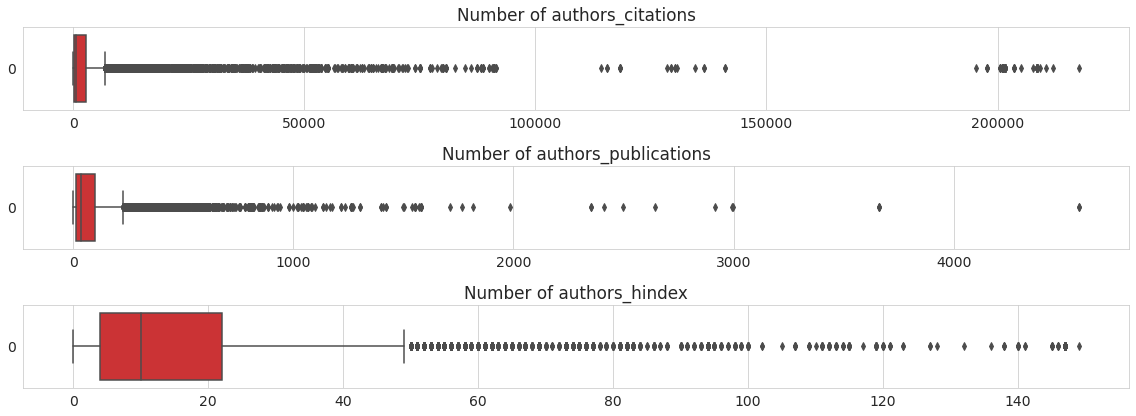

In [13]:
categories = ["authors_citations", "authors_publications", "authors_hindex"]

fig, axs = plt.subplots(3,1,figsize=(16, 6))
for ax, cat in zip(axs, categories) :
    to_plot = [int(item) for sublist in df_data[cat].values for item in sublist.split(";") if int(item) != -1]
    ax.set_title('Number of ' + cat) 
    sns.boxplot(data=to_plot, orient="h", ax=ax)
    
plt.tight_layout()

Using the boxplots above, we see that the distributions are skwed.

Looking at the x-axis of the first boxplot, we see that the distribution is heavily skwed. Hence we should not replace the -1s by the mean of the values different to -1.

The two other distributions are also skwed, but they have a less strong heavy tail.

##### Are there senior authors which are missing information?

Since we used the citation and publication columns to compute the reputation of the most senior author, it is necessary to verify that no senior author has -1.

In [14]:
for i in range(len(df_data['authors_citations'])):
    senior_author_citation=int(df_data['authors_citations'][i].split(";")[-1])
    if senior_author_citation == -1:
        "There is a senior author missing information"

Therefore, every senior author have information regarding their citations and publications, so we do not need to worry about the calculation of the reputation.

##### Conclusion regarding -1s

Overall, there are only 104 authors missing information on their hindex, citations and publications, which represents 0.6% of the dataset.

Furthermore, no article has all its authors missing information, which means that no article will have an undefined median if we don't take them into account. Taking those values into account when calculating the median could reduce the actual true median for these 104 articles. Therefore, it would be appropriate to not considering them in the median. 

As theses authors with missing information are only a strict subset of authors and looking at the distribution, we chose to simply remove the -1's.

### Task 1.2

Now that you have cleaned up your data, your next task is to divide your data into a training set and a testing set. You should do this in two ways:

1. First, do it randomly. Split the data into a training set (70%) and a testing set (30%). We refer to these as "random split" in the subsequent tasks.
2. Second, do it longitudinally. Use the data from 2018 and 2019 for the training set, and the data from 2020 as the testing set. We refer to these as "longitudinal split" in the subsequent tasks.


In [15]:
np.random.seed(1)
df_data_random = df_data.reindex(np.random.permutation(df_data.index))

split = int(len(df_data_random) * 0.7)
df_data_random_train = df_data_random[:split]
df_data_random_test = df_data_random[split:]

In [16]:
train_years = [2018, 2019]

df_data_longitudinal_train = df_data[df_data['year'].apply(lambda x: int(x) in train_years)]
df_data_longitudinal_test = df_data[df_data['year'].apply(lambda x: int(x) == 2020)]

### Task 1.3

Build a Linear Regression model (use [sklearn](https://scikit-learn.org/stable/)) that predicts the score of a paper (which is in the variable ratings in the dataframe). Train it and test it using the split you previously defined. Your model should use as features:
- Median values for the number of author citations, publications and h-indexes, as calculated in Task 1.1.1.

- `reputation` of the last author, as calculated in Task 1.1.2.

For the two scenarios above (random split and longitudinal split):

1. Report the model $R^2$ in each case (for the testing set).
2. **Discuss:** Hypothesize a reason why the results are different. Additionally, interpret the $R^2$ value for the longitudinal split. How can it be negative?
3. **From now onwards (in this task and the following ones), consider only the random split.** For a given entry $X$ your model outputs a predicted score $Y'$. The difference between the real score $Y$ and the predicted score $Y'$ is called the "residual". Plot the distribution of your residuals for the test set. Using this distribution, estimate what is the probability that your prediction is off by more than 2-points? Provide bootstrapped confidence intervals for your answer.
4. **Discuss:** Identify three additional features that are already computed in your dataframe and that could boost your model's predictive performance. You are not allowed to use the variable `decisions` as an input here. Before running any experiments, discuss why each of these features might add valuable information to your model.
5. Report the $R^2$ (for the test set) for a newly trained model with these additional features. Please note that you do not need to improve the model performance to be successful in this task!

**Hint**: [Metrics!](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)

In [17]:
# Function used in tasks 1.3 & 1.4
def get_R_sqr_from_model(model, train, test, columns):
    """
        Generic function that computes the R^2 score given a model, a train and test set and a set of columns
    """
    X_train = train[columns]
    y_train = train['ratings']
    model.fit(X_train, y_train)
    X_test = test[columns]
    y_test = test['ratings']
    return r2_score(y_test, model.predict(X_test))

#### Task 1.3.1

In [18]:
features = ['citation_median','publications_median', 'hindex_median', 'reputation']
R_random = get_R_sqr_from_model(LinearRegression(), df_data_random_train, df_data_random_test, features)
R_longitudinal = get_R_sqr_from_model(LinearRegression(), df_data_longitudinal_train, df_data_longitudinal_test, features)

print('R^2 for the linear regression with random split : {}'.format(R_random))
print('R^2 for the linear regression with longitudinal split : {}'.format(R_longitudinal))

R^2 for the linear regression with random split : 0.09894623463851693
R^2 for the linear regression with longitudinal split : -0.24009712493164082


#### Task 1.3.2

_Hypothesize a reason why the results are different_:

If the distribution is the same for the whole dataset, the result should be the same. However, if the data of 2020 acceptance is from another distribution (might correspond to a change in acceptance criteria), the longitudinal model trains on a distribution and is tested on another one. This implies that our model will have bad predictions, unlike a model that is trained and tested on data from the same distribution.

_Additionally, interpret the $R^2$ value for the longitudinal split. How can it be negative?_

$R^2$ compares the fit of the chosen model with that of a horizontal straight line. If the chosen model fits worse than a horizontal line, then $R^2$ is negative. $R^2$ is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.
$R^2$ is computed as $1−\frac{SS_{res}}{SS_{tot}}$ where $SS_{res}$ is the residual sum of squares and $SS_{tot}$ is the total sum of squares. When $SS_{res} > SS_{tot}$ (i.e. the model fits the data very badly) then the $R^2$ score becomes negative.

#### Task 1.3.3

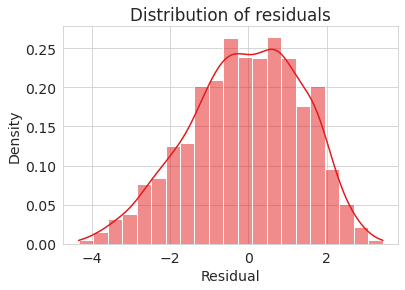

In [19]:
# Create model
model = LinearRegression()
X_train_l = df_data_random_train[['citation_median','publications_median', 'hindex_median', 'reputation']]
y_train_l = df_data_random_train['ratings']
model.fit(X_train_l, y_train_l)

X_test_l = df_data_random_test[['citation_median','publications_median', 'hindex_median', 'reputation']]
y_test_l = df_data_random_test['ratings']
y_pred = model.predict(X_test_l)

distribution = y_test_l.values - y_pred
ax = sns.histplot(distribution, kde=True, legend=False, stat='density')
ax.set(title='Distribution of residuals', xlabel='Residual')
plt.show()

In [20]:
def is_larger_than_2_points(residuals):
    return np.sum(np.abs(np.array(residuals)) > 2) / len(residuals)

In [21]:
probability = is_larger_than_2_points(distribution)
lo,hi = bootstrap_CI(distribution, func=is_larger_than_2_points)
print("The residual is off by more than 2 points with probability %.3f, with a 95%% CI [%.3f, %.3f]" % (probability, lo, hi))

The residual is off by more than 2 points with probability 0.164, with a 95% CI [0.145, 0.185]


#### Task 1.3.4

_Identify three additional features that are already computed in your dataframe and that could boost your model's predictive performance_

The following features could be useful for prediction:
- _arxiv_: Releasing the paper online before it is online breaks the anonymity of the authors/institutions and can influence the scoring of the reviewers. For example, reviewers may give give a greater score when finding out that the reputation of the authors/institutions of the papers is great; and inversely be less willing to give a good score to unknown authors/institutions. This is just an example and not necessarily the truth, but it does show that adding this variable could give additional predictive power to the model.
- _has_top_company_ & _has_top_institution_ : These 2 variables are an indication of the profile of the researchers behind the papers considered. Top companies and top institutions want to publish in quantity and in quality, therefore the skill of researchers are expected to be excellent and the resources available to them to be higher (funds, computational power, ...). These variables could therefore be a good indicator of the score of the papers, bringing more predictive power. Particularly, _has_top_company_ gives new information to the model (unlike _has_top_institution_ , which highlights what is alread present the csrankings).

#### Task 1.3.5

In [22]:
features = ['citation_median','publications_median', 'hindex_median', 'reputation', 'arxiv', 'has_top_company', 'has_top_institution']
R_random_add_feat = get_R_sqr_from_model(LinearRegression(), df_data_random_train, df_data_random_test, features)

print('R^2 for the linear regression with random split and additional features: {}'.format(R_random_add_feat))

R^2 for the linear regression with random split and additional features: 0.1142051543407484


### Task 1.4

Experiment with training a different regressor, a [Gradient Boosting Regressor](https://scikit-learn.org/stable/modules/ensemble.html?highlight=xgboost#gradient-boosting). This regressor is analogous to the Gradient Boosting Classifier that you have seen in class. This model performs extremely well for a variety of tasks and is often used in machine learning competitions for tabular data (e.g., on [Kaggle](www.kaggle.com)). You must:

1. Train a Gradient Boosting Regressor without specifying any parameters, e.g. `GradientBoostingRegressor().fit(X, y)`, and report its $R^2$ on the testing set. Your model should again use as features:
    - Median values for the number of author citations, publications and h-indexes as calculated in Task 1.1.1.
    - `reputation` of the last author, as calculated in Task 1.1.2.
2. Create an additional feature called $crazy$, which is derived as follows. If the score  of the paper, $ratings$, is bigger than 4.96, then $crazy = 9 - ratings$, otherwise, $crazy = - ratings$. Train a Gradient Boosting Regressor to predict paper scores using only $crazy$ as a feature. Additionally, train a Linear Regression model to predict paper scores using only $crazy$ as a feature. Report the $R^2$ in the testing set.
3. **Discuss:** Why does the Gradient Boosting Regressor perform so much better?

#### Task 1.4.1

In [23]:
features = ['citation_median','publications_median', 'hindex_median', 'reputation']
R_s = get_R_sqr_from_model(GradientBoostingRegressor(), df_data_random_train, df_data_random_test, features)
print("R^2 for the gradient boosting regressor : {}".format(R_s))

R^2 for the gradient boosting regressor : 0.08933015393046873


#### Task 1.4.2

In [24]:
def compute_crazy(row):
    rating = row['ratings']
    if rating >= 4.96:
        return 9 - rating
    return -rating

X_train_crazy = pd.DataFrame()
X_train_crazy['crazy'] = df_data_random_train.apply(lambda row: compute_crazy(row), axis=1)

X_test_crazy = pd.DataFrame()
X_test_crazy['crazy'] = df_data_random_test.apply(lambda row: compute_crazy(row), axis=1)

In [25]:
def get_r2_from_crazy(model):
    y_train_g = df_data_random_train['ratings']
    model.fit(X_train_crazy, y_train_g)

    y_test_g = df_data_random_test['ratings']

    return r2_score(y_test_g, model.predict(X_test_crazy))

In [26]:
r2_gradient_boosting = get_r2_from_crazy(GradientBoostingRegressor())
r2_linear_regression = get_r2_from_crazy(LinearRegression())

print(f"Linear regressor R2 score: {r2_linear_regression}")
print(f"Gradient boosted regressor R2 score: {r2_gradient_boosting}")

Linear regressor R2 score: 0.4220980751106389
Gradient boosted regressor R2 score: 0.9999981093345431


#### Task 1.4.3



The Gradient Boosted Model has an $R^2$ value of 0.99, much higher than the 0.42 obtained for the Linear Regression. This is due to the usage of boosting, an ensemble method which combines the result of multiple weak classifiers to get a better predictive power.



### Task 1.5

Complex models often have several hyper-parameters. 
To obtain the best results, it is common-place to use a cross-validation set-up in your training data to find the best hyper-parameters, and then use it for the test set.


1. Write modular code (i.e., a function) to divide your training data into $N$ folds and perform cross-validation.
2.  Experiment tuning two hyper-parameters of the Gradient Boosting Regressor: `n_estimators` and `learning_rate`.
For each possible combination of the two hyper-parameters (see below for the range of values that you should try for each hyper-parameter), train your model in a cross-validation setup with $N$=20. Report the mean $R^2$ along with the 90% CI for the 18 scenarios. Notice that you can calculate the 90% CI in a bootstrap-like fashion.
    - `n_estimators`$ \in  \{ 50, 75, 100, 150, 200, 250\}$
    - `learning_rate`$ \in  \{ 0.1, 0.05, 0.01\}$.
3. With the best hyper-parameters obtained, train your model with the entire training set and report the $R^2$ on the testing set.
4. **Discuss:** Why don't we tune the hyper-parameters in the testing set instead of doing cross-validation in the training set?

#### Task 1.5.1

In [27]:
def cross_validate(n_estimators, learning_rate, n_splits=20):
    
    """ Given n, the number of splits to make, n_estimators the number of estimators 
        and learning_rate the learning rate, calculates the mean R2 of the n splits.
    """
    
    #Dataset features
    X = df_data_random_train[['citation_median','publications_median', 'hindex_median', 'reputation']]
    y = df_data_random_train['ratings']

    #Split data
    kf = KFold(n_splits=n_splits)
    
    r2_scores = [] # list to keep R2 scores of each split
    
    #Iterate over each splits, calculating R2 at each iteration
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = GradientBoostingRegressor(learning_rate=learning_rate,n_estimators=n_estimators)  
        model.fit(X_train, y_train)
        r2_scores.append(r2_score(y_test, model.predict(X_test)))

    return np.mean(r2_scores), bootstrap_CI(r2_scores, iterations=1000, a=0.1) # 90% confidence interval

#### Task 1.5.2

In [28]:
n_estimators =[50,75,100,150,200,250]
learning_rate=[0.1,0.05,0.01]

#Initialize lists to keep results and corresponding hyperparameters
R2_mean=[]
CIs = []
n_e_loop=[]
l_r_loop=[]

#Iterate over each estimator and learning rate
for n_e in n_estimators:
    for l_r in learning_rate:
        
        print('\rTraining (ne=%d , lr=%g)' % (n_e,l_r), end='')
        
        #Keep results and corresponding hyperparameters in a list
        r2, ci = cross_validate(n_e,l_r)
        R2_mean.append(r2)
        CIs.append(ci)
        n_e_loop.append(n_e)
        l_r_loop.append(l_r)

Training (ne=250 , lr=0.01)

In [29]:
#Transform lists in a dataframe to visualizre results
cross_validate_df = pd.DataFrame({"n_estimators":n_e_loop,"learning_rate":l_r_loop,"R2":R2_mean})

# add a `annot` column which will be used to annotate the heatmap (formatted R2 and the CI)
cross_validate_df['annot'] = [f"{r2:.3f}\n[{lo:.3f},{hi:.3f}]" for (lo,hi),r2 in zip(CIs,R2_mean)]
pivoted = cross_validate_df.pivot(index='n_estimators', columns='learning_rate', values=['R2','annot'])

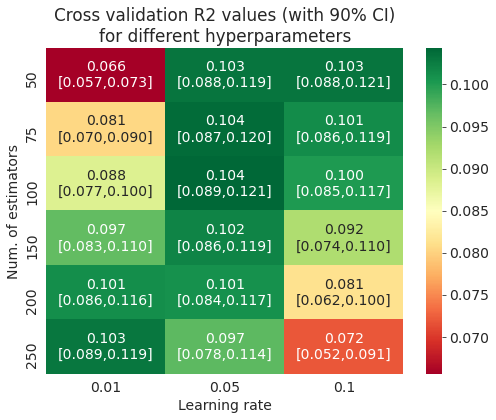

In [30]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(pivoted['R2'].astype(float), annot=pivoted['annot'], cmap='RdYlGn', fmt='s')
ax.set(title="Cross validation R2 values (with 90% CI)\nfor different hyperparameters", \
       xlabel="Learning rate", ylabel="Num. of estimators")
plt.show()

#### Task 1.5.3

In [31]:
# get best parameters
best = cross_validate_df.sort_values(by='R2', ascending=False).iloc[0]
best_lr, best_ne = best['learning_rate'], int(best['n_estimators'])
print(f"The best hyperparameters were ne={best_ne} and lr={best_lr}.")

The best hyperparameters were ne=100 and lr=0.05.


In [32]:
#Evaluating the Model on the random testing set
best_model = GradientBoostingRegressor(learning_rate=best_lr,n_estimators=best_ne)
features = ['citation_median','publications_median', 'hindex_median', 'reputation']
r2 = get_R_sqr_from_model(best_model, df_data_random_train, df_data_random_test, features)
print("R2 on the testing set for the optimal hyperparameters is {:.5f}".format(r2))

R2 on the testing set for the optimal hyperparameters is 0.09870


#### Task 1.5.4

Hyperparameters are tested using k-folds in the training set, and not on the testing set as to have an idea of how the model performs on new data. If we used the testing set to find the optimal hyperparameters, we would have no data left to test it on. Moreover, evaluating the performance on the testing set allows comparison with other models in an unbiased way (since the model has not been trained on this testing set). This is examplified by the fact that the $R^2$ for the optimal hyperparameters on the testing set (0.098) is lower than the one obtained in the training set (0.104). This result is logical as the model has never seen this data.

## _Step 2:_ What influences papers getting accepted?

Time to change hats!

If before we were interested in creating an accurate regressor, now we are interested in understanding what increases the chance of papers getting accepted. 

Typically, in that scenario, simpler models with a clear statistical interpretation (e.g. logistic regression) yield more interesting insights.

For the analysis in this and the next step, you should use [statsmodels](https://www.statsmodels.org/) (for the regressions) and [scipy](https://www.scipy.org/) (for the statistical hypothesis testing).


### Task 2.1

Let's warm up with some visualizations and some hypothesis testing!

1. Plot the distributions of 1) ratings of papers that got accepted in 2020, 2) ratings of papers that got rejected in 2020.
2. Select a statistical test to compare whether the mean for ratings of papers that got accepted in 2020 is significantly higher.
3. **Discuss:** Justify why the statistical test you selected is appropriate. Interpret the test-related statistic and its p-value: concretely, what do they mean?

#### Task 2.1.1

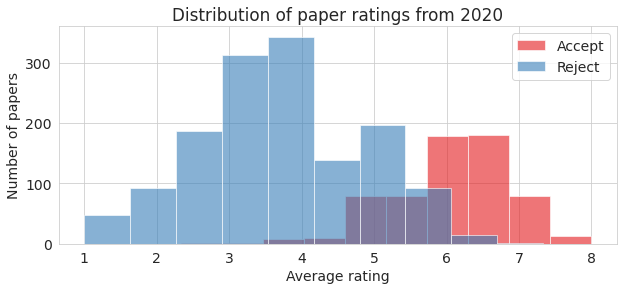

In [33]:
df_data_2020 = df_data[df_data['year'] == 2020].copy()
df_data_2020.groupby('decisions')['ratings'].hist(figsize=(10,4), legend=True, alpha=0.6)
plt.title('Distribution of paper ratings from 2020')
plt.xlabel('Average rating')
plt.ylabel('Number of papers')
plt.show()

#### Task 2.1.2

In [34]:
def normality_test(distribution):
    """
    null hypothesis: the data comes from a normal distribution
    """
    # The pvalmethod flag is only used to disable some warnings
    stat, p = diagnostic.kstest_normal(distribution, dist='norm', pvalmethod="approx")
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [35]:
accepted_2020_ratings = df_data_2020[df_data_2020['decisions'] =='Accept']['ratings']
rejected_2020_ratings = df_data_2020[df_data_2020['decisions'] =='Reject']['ratings']

# First, we check if our distributions are normal
print(" - Accepted papers ratings' distribution:")
normality_test(accepted_2020_ratings.values)
print(" - Rejected papers ratings' distribution:")
normality_test(rejected_2020_ratings.values)

 - Accepted papers ratings' distribution:
Statistics=0.128, p=0.000
Sample does not look Gaussian (reject H0)
 - Rejected papers ratings' distribution:
Statistics=0.138, p=0.000
Sample does not look Gaussian (reject H0)


As the data does not come from a normal distribution, we have two options:
- Using the decision tree in Bob West's lecture, we should use the Mann–Whitney U test. However, the null hypothesis of this test is that the probability of X being greater than Y is equal to the probability of Y being greater than X (for randomly selected values X and Y from two populations). Hence this hypothesis is not exactly what we are looking for and we will require a bit a work to obtain the wanted claim.

- The assumption part of [the t-test Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test#Assumptions) states the following: "The means of the two populations being compared should follow normal distributions. Under weak assumptions, this follows in large samples from the central limit theorem, even when the distribution of observations in each group is non-normal.". Hence, another possibility is to still use the t-test under weak assumptions.

For simplicity, we chose to use the second option.

In [36]:
# Variance comparaison
print("The variance for the accepted paper's rating : {}".format(accepted_2020_ratings.std()))
print("The variance for the rejected paper's rating : {}".format(rejected_2020_ratings.std()))

The variance for the accepted paper's rating : 0.806021220769791
The variance for the rejected paper's rating : 1.2331116504841175


Using the decision tree in Bob West's lecture, we know we have to use the Welch's t-test

In [37]:
# Welch's t-test
stat, p = ttest_ind(accepted_2020_ratings, rejected_2020_ratings, equal_var=False)
print(f"Student's t-test: {stat:.3f} (p-value: {p:.3g})")

Student's t-test: 53.562 (p-value: 0)


#### Task 2.1.3

Student's t-test tests whether the means of two independent samples are significantly different.
The null hypothesis (H0) is that the mean of the samples are equal and the alternative hypothesis (H1) is that they are not.
Since the p-value is smaller than 0.05, we reject H0 in favor of H1 and conclude that the mean of ratings for accepted papers is significantly higher than that of rejected ones, since the result of the test is positive and large.

It seemed natural for us to justify why the statistical test we selected is appropriate when selecting it. Hence, wee the above question for the justification.

### Task 2.2

We will now carry out a logistic regression modeling the binary variable `decisions` as a function of the continuous variable `ratings` and an intercept. 

Recall that a logistic regression is a model in the form:

$$
\log \Big( \frac{p}{1-p} \Big) = b_0 + b_1x_1 + b_2x_2 + \ldots
$$

Where $p$ is the probability of the dependent variable (here, `decisions`) being equals to 1. 
Note that $\frac{p}{1-p}$ represents the odds of the variable, and thus, on the left-hand side we have the log-odds of the variable.
This can be also written as:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0 + b_1 x_1 + b_2 x_2 + \ldots} =  e^{b_0} e^{b_1 x_1} e^{b_2 x_2} \ldots
$$

Given a linear variable, say $x_1$, if we increase the value associated with this variable by a single unit, and keep everything constant, we have:

$$
 e^{b_1(x_1+1)} =  e^{b_1 x_1 + b_1} = e^{b_1 x_1}e^{b_1}  
$$

This means that we multiply the odds of the outcome variable by $e^{b_1}$. Thus, let's say that $x_1$ is the average rating, and $\beta_1$ is the associated coefficient. Also, let's assume that $\beta_1$ equals 2. In that case, increasing the score of the paper by 1 unit is equivalent to multiplying both sides of the previous equation by $e^{b_1}$. The original equation for our model becomes:

$$
\Big( \frac{p}{1-p} \Big) = e^{b_0} e^{b_1 x_1} 
$$
$$
\Big( \frac{p}{1-p} \Big) e^{b_1}  = e^{b_0} e^{b_1 x_1} e^{b_1}
$$

Since $b_1=2$, we have that this is the same as multiplying the odds of the variable by $e^2\approx7$. 
So for example, if a paper with a score 5 had $p=0.05$ of being approved, its odds would be $0.05/0.95\approx0.052$. According to our model, an increase in 1-rating point would mean that the new odds would be $0.052*7\approx0.36$. Using the odds formula  ($\frac{p}{1-p}$), this suggests that this paper would have a chance of $0.56$ of being accepted.

---

This is the theory. Now, let's find out what the real world looks like.


1. Fit a logistic regression model to our data considering as the training set all papers submitted in 2020. Your model should predict a binary variable related to decisions (which equals true if the paper was accepted and false otherwise) as a function of the paper ratings and an intercept. In mathematical notation:
$$
d = b_0 + r b_1
$$
Where $d$ is the binary variable corresponding to a decision, $r$ is a numeric variable corresponding to the rating a paper has received and $b$ are coefficients.
Notice that here we have no testing set!
Report the summary of your model. 
2. **Discuss:** Interpreting the coefficients of your model, calculate the probability that a paper with a score 7 will be accepted.


#### Task 2.2.1

In [38]:
# define some useful conversions
def p_to_log_odds(p):
    return np.log(p/(1-p))
def log_odds_to_p(odds):
    return np.exp(odds) / (1+ np.exp(odds))

In [39]:
# we convert our decisions column to a binary/numerical value that statsmodel can work with
# 1 = Accepted     0 = Rejected
df_data_2020['decisions'] = df_data_2020['decisions'].apply(lambda x: 1 if x == 'Accept' else 0)

In [40]:
mod = smf.logit(formula='decisions ~ ratings', data=df_data_2020)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.251882
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              decisions   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2050
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5913
Time:                        21:58:20   Log-Likelihood:                -516.86
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.8811      0.597    -21.574      0.000     -14.051     -11.711
ratings        2.3672      0.

#### Task 2.2.2

We see that ratings is a very good predictor (very small p-value). The intercept is the log-odds value corresponding to an article that has a rating of 0. If we compute the associated probability of being accepted we obtain $p \simeq 2.55\cdot10^{-6}$. Each 1-point increase in points then adds 2.367 to the log-odd value to be accepted.

In [41]:
log_odds_accepted = lambda r: res.params['Intercept'] + r * res.params['ratings']
r = 7
print(f"d({r}) = {res.params[0]:.3f} + {r} * {res.params[1]:.3f} = {log_odds_accepted(r):.3f}")

d(7) = -12.881 + 7 * 2.367 = 3.689


In [42]:
print(f"A paper with average rating {r} will be accepted with probability {log_odds_to_p(log_odds_accepted(r)):.3f} !")

A paper with average rating 7 will be accepted with probability 0.976 !


### Task 2.3

Our model is not so interesting since the only independent variable (that is, our model' feature or predictor) is something blatantly associated with paper acceptance. Let's go further! 

1. Run a logistic regression with the binary decision as the dependent variable (the outcome) and using as independent variables (the features): ratings, the reputation of the last author, and whether the paper was on arxiv or not. That is, in [patsy-style formula](https://patsy.readthedocs.io/en/latest/formulas.html): `decisions ~ ratings + reputation + arxiv` (variable names do not need to be exactly these). Consider all papers submitted in 2020 as your training data.
Notice that reputation was calculated in Task 1.1. 
2. **Discuss:** Unlike `ratings` and `reputation`, the variable `arxiv` is binary. Following the same logic as we did for continuous variables in the text of Task 2.2, interpret the meaning of this coefficient. What happens to the odds ratio if the paper was seen in arxiv? Is this effect statistically significant?

#### Task 2.3.1

In [43]:
mod = smf.logit(formula='decisions ~ ratings + reputation + arxiv', data=df_data_2020)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.250440
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              decisions   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2048
Method:                           MLE   Df Model:                            3
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5936
Time:                        21:58:20   Log-Likelihood:                -513.90
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -13.2261      0.634    -20.873      0.000     -14.468     -11.984
arxiv[T.True]     0.

#### Task 2.3.1
Let $b_2$ be the coeficient of the arxiv variable. If we follow the same reasoning as before, the odds will be multiplied by $e^{1\cdot b_2} = e^{b_2}$ if the paper was seen in arxiv as opposed to $e^{0\cdot b_2} = 1$ if it wasn't. Therefore if it wasn't seen, it won't have an impact, but if it was, it will increase the odds of it being accepted ($b_2$ being positive in our case). So we could naively conclude that to boost our chance of getting our paper accepted, we simply need to pre-print it.
However, the arxiv variable's significance is questionable due to it's p-value (which is > 0.05).
The reputation doesn't seem significant either (by looking at it's p-value) but it may be interesting to combine it with another variable, such as arxiv ?

### Task 2.4

Let's finally move on to the question that you have been dying to answer: Do pre-prints favor top institutions? 

In order to (try to) answer that question, you must fit yet another logistic regression.

Your regression should have the paper decision as the dependent variable, and `ratings`, `reputation`, and `arxiv` as independent variables just like in task 2.3. Yet, here, include also as independent variables the binary variable `has_top_institution`, which equals 1 if the paper has an author in a top-10 institution; and the interaction variable `arxiv:has_top_institution`, which equals one only if the paper is from a top-10 institution **and** if it appeared on arxiv before the submission deadline. In patsy-style formula your model should look something like: 

`decisions_bool ~ ratings + reputation + arxiv + has_top_institution + arxiv:has_top_institution`


1. Fit this model and estimate the effect of posting on arxiv for a top institution. Again, consider only papers submitted in the 2020 edition.
2. **Discuss:** Interpreting the p-values, discuss: is this evidence that arxiv breaks double-blind submissions?

#### Task 2.4.1

In [44]:
mod = smf.logit(formula='decisions ~ ratings + reputation + arxiv + has_top_institution + arxiv:has_top_institution', data=df_data_2020)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.247320
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              decisions   No. Observations:                 2052
Model:                          Logit   Df Residuals:                     2046
Method:                           MLE   Df Model:                            5
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5987
Time:                        21:58:20   Log-Likelihood:                -507.50
converged:                       True   LL-Null:                       -1264.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -13.3940      0.647    -20

#### Task 2.4.2
If we try to interpret the coefficients, we are tempted to say that pre-prints do favor papers from top institutions, as the combined variable has a higher coefficient than being seen in arxiv alone. However, p-values are still pretty high so we cannot be certain of the significance of our conclusions.

## Step 3: Matching

Okay, so let's change hats one last time.

As you have all seen in class, a particularly powerful way of disentangling causal effects from observational data is through matching: making sure we are not comparing apples to oranges.


### Task 3.1

One of the ways to do matching is called "Propensity Score Matching." There, we calculate a *propensity score* for each subject which represents the propensity to receive a "treatment." Then, we match subjects who received and did not receive the treatment, but that had similar propensity scores (that is, even though some received the treatment and some did not, they had similar chances to receive it).

In our specific case, we can further attempt to study the impact of pre-prints by considering publishing to arxiv as our "treatment".

In that context, the first step to perform propensity score matching is to create a classifier that predicts whether a paper was published on arxiv or not.

1. We have trained this classifier for you (don't get spoiled!). You may load the pandas dataframe entitled `propensity_scores.csv.gz` from the github repo. 
Notice that we will be using only the articles published in 2020. 
Create a new dataframe that is a merged version of this new dataframe with the dataframe you have been working on so far. Remember to keep only the papers published in 2020!
2. **Discuss:** In which way is this classifier (that is a classifier trained to estimate propensity scores) different from the previous classifier that you trained in Step 1?

**Hint:** For a classifier tra we don't need a training set and a test set!


#### Task 3.1.1

In [45]:
props = pd.read_csv('data/propensity_scores.csv.gz', compression='gzip')
data_2020 = df_data_2020.merge(props, on='paper')
assert len(df_data_2020) == len(data_2020)
assert len(data_2020) == len(data_2020)
data_2020.head(2)

,year,paper,authors,ratings,decisions,institution,csranking,categories,authors_citations,authors_publications,authors_hindex,arxiv,citation_median,publications_median,hindex_median,reputation,has_top_company,has_top_institution,propensity_score
0,2020,Pitfalls of In-Domain Uncertainty Estimation a...,Arsenii Ashukha;Alexander Lyzhov;Dmitry Molcha...,6.666667,1,Samsung;Skolkovo Institute of Science and Tech...,-1;-1;-1;481,0,488;12;481;2097,14;2;17;124,8;1;7;16,False,484.5,15.5,7.5,1.253127,0,0,0.360486
1,2020,An Inductive Bias for Distances: Neural Nets t...,Silviu Pitis;Harris Chan;Kiarash Jamali;Jimmy Ba,6.750000,1,"Department of Computer Science, University of ...",18;18;18;18,1;10,15;23;3;52924,9;13;3;56,2;3;1;22,False,19.0,11.0,2.5,2.975924,0,0,0.567842


#### Task 3.1.2
It is different because in task 1 we were trying to predict a certain value (rating) so we needed a test set to evaluate how our classifier performs on new data. However, the propensity score model is not used to make predictions about new data but to balance our dataset between the treatment and no-treatment groups. It may even be good to overfit the data a little, which is typically not something we want when training a classifier model.

### Task 3.2

Now is time to match users! You will be implementing a technique called *caliper matching*. 

Create pairs of users as follows. For each treated subject (here a paper that was submitted to arxiv), find a non-treated subject (a paper that was not submitted to arxiv) with similar propensity score. Namely, if the propensity score of the treated unit is $p_t$, you must find a non-treated unit $p_c$ with propensity score $|p_{c} - p_t| < \epsilon$. If there is no such a non-treated unit, you may ignore the treated unit and move forward with the matching. Notice that your output must be a 1-to-1 matching. So each paper can only be matched once.

1. Perform this matching procedure using $\epsilon = 0.05$.
2. Report how many pairs did you manage to match? How many didn't you?

#### Task 3.2.1

In [46]:
def caliper_distance(prop1,prop2,e = 0.05):
    """Function to know if the condition for caliper matching is satisfied between two propensity scores
    and the corresponding distance."""
    dist = np.abs(prop1 - prop2)
    return dist, dist < e

In [47]:
def match(data):
    treatment_df = data[data['arxiv']]
    control_df = data[~data['arxiv']]
    print(f"We have {len(treatment_df)} subjects that received the treatment and {len(control_df)} that did not.")

    # we use a a networkx graph to find a min-distance full matching
    # (or a max cardinality one if full matching isn't possible)
    G = nx.Graph()
    idx = 1
    for i, treated in treatment_df.iterrows():
        print('Adding edges for %d / %d' % (idx, len(treatment_df)), end='\r', flush=True)
        for j, controled in control_df.iterrows():

            # add an edge between two observations if satisfy the caliper matching condition
            weight, ok = caliper_distance(treated['propensity_score'], controled['propensity_score'])
            if ok:
                G.add_edge(i,j, weight=weight)
        idx += 1
    print('\nMatching... ', end='')
    try:
        matching = nx.bipartite.matching.minimum_weight_full_matching(G)
        matching = set(tuple(sorted((x,y))) for x,y in matching.items()) # convert to a set of tuples (pairs)
    except:
        print("\nOh no, no full matching exists... fallback to maximal cardinality matching.")
        print("Matching... ", end='')
        matching = nx.matching.maximal_matching(G)
    print('done !')
    return matching

In [48]:
matching = match(data_2020)

We have 590 subjects that received the treatment and 1462 that did not.
Adding edges for 590 / 590
Matching... done !


#### Task 3.2.2

In [49]:
print(f'We managed to match {len(matching)} pairs, so we have {len(data_2020.query("arxiv"))-len(matching)} \
unmatched in the treatment group and {len(data_2020.query("not arxiv"))-len(matching)} unmatched in the control group.')

We managed to match 590 pairs, so we have 0 unmatched in the treatment group and 872 unmatched in the control group.


In [50]:
matched_data = data_2020.loc[[index for match in matching for index in match]]

### Task 3.3

Let's evaluate your matching! There are more rigorous ways to do it, but we'll go the easy path.


1. Using one or several appropriate plot types, visualize the distributions of the variables reputation and ratings, for treated and non-treated subjects that you matched.
2. Visualize the distributions of these variables for all papers from 2020 that appeared on arxiv, and all papers that did not (including those you did not manage to match).
3. **Discuss:** According to your visual analysis (no statistical tests needed here), did the matching do a good job at balancing covariates?

#### Task 3.3.1

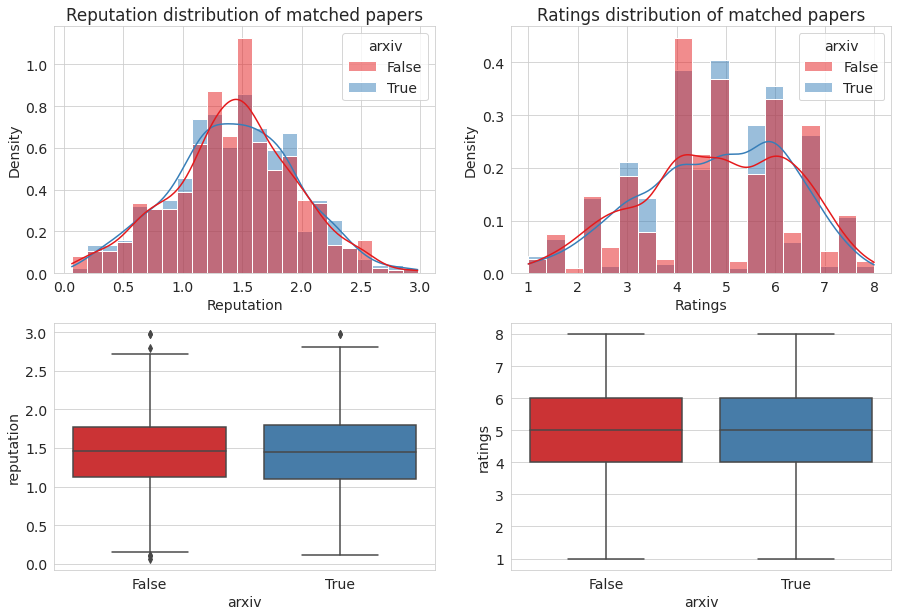

In [51]:
def plot_post_matching_distributions(data, columns=['reputation', 'ratings']):
    fig, axes = plt.subplots(ncols=len(columns), nrows=2, figsize=(15,10))
    for i,col in enumerate(columns):
        sns.histplot(ax=axes[0][i], data=data, x=col, hue='arxiv', kde=True, stat='density', common_norm=False)
        axes[0][i].set(title=f'{col.capitalize()} distribution of matched papers', ylabel='Density', xlabel=col.capitalize())
        sns.boxplot(ax=axes[1][i], data=data, x='arxiv', y=col)
    plt.show()

plot_post_matching_distributions(matched_data)

#### Task 3.3.2

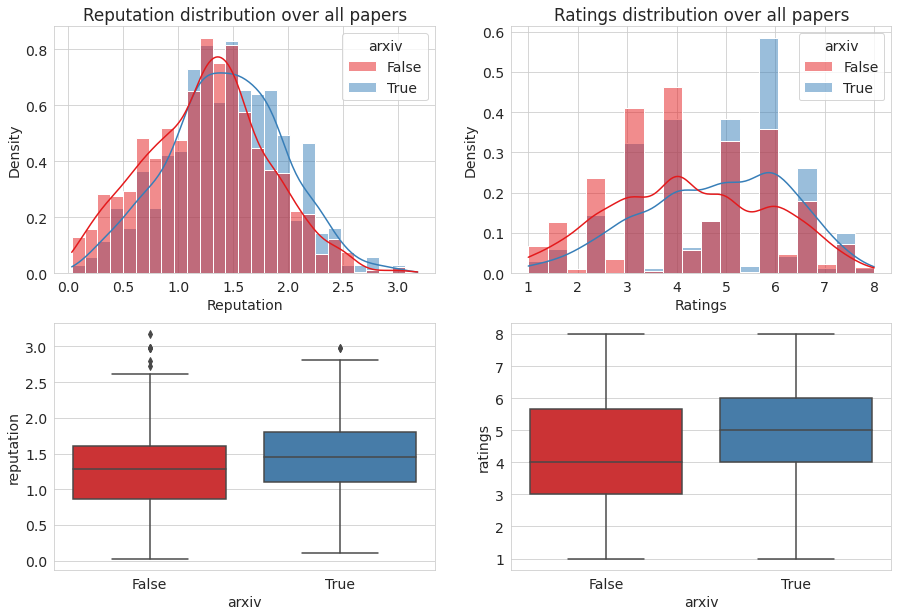

In [52]:
def plot_pre_matching_distributions(data, columns=['reputation', 'ratings']):
    fig, axes = plt.subplots(ncols=len(columns), nrows=2, figsize=(15,10))
    for i,col in enumerate(columns):
        sns.histplot(ax=axes[0][i], data=data, x=col, hue='arxiv', kde=True, stat='density', common_norm=False)
        axes[0][i].set(title=f'{col.capitalize()} distribution over all papers', ylabel='Density', xlabel=col.capitalize())
        sns.boxplot(ax=axes[1][i], data=data, x='arxiv', y=col)
    plt.show()

plot_pre_matching_distributions(data_2020)

#### Task 3.3.3
It seems like the matching was a success! The distribution curves as well as the boxplots are almost identical for both ratings and reputation. We are now comparing papers that have similar ratings and reputations, i.e. comparing apples to apples.

### Task 3.4

Finally, it's time to estimate the treatment effect. Given that we have pairs of matched samples, one that received treatment and one that did not, and that they have associated outcomes $y_{treat}$ and $y_{\neg treat}$. We can calculate the average treatment effect as:

$$
ATE = \frac{1}{N} \sum_i^N  y_{treat}^{(i)} - y_{\neg treat}^{(i)}
$$

Notice that here the outcome is a simple binary variable which equals 1 if the paper has been accepted and equals 0 if the paper has been rejected, and $N$ is the total number of matched samples in our analysis.

According to your matched sample, estimate the treatment effect of publishing a paper on arxiv. Report the 95% CI through bootstrapping.


In [53]:
# maps the found matchings (pairs of ids) to their decisions (1 if accepted, 0 if rejected)
# we impose the order as: treated observation, untreated observation
def decisions_from_matching(data, matching):
    decisions = []
    for i,j in matching:
        p_i,p_j = data.loc[i], data.loc[j]
        p_treat,p_control = (p_i,p_j) if p_i['arxiv'] else (p_j,p_i)
        decisions.append((p_treat['decisions'],p_control['decisions']))
    return decisions

In [54]:
# computes the average treatment effect, takes as input a list of pairs (y_treat, y_no_treat)
def compute_ate(matching_decisions):
    ate = 0
    for i,j in matching_decisions:
        ate += i - j
    return ate / len(matching_decisions)

In [55]:
decisions = decisions_from_matching(data_2020, matching)
lo,hi = bootstrap_CI(decisions, func=compute_ate)
print(f"The average treatment effect is {compute_ate(decisions):.3f}. The 95% CI is [{lo:.3f},{hi:.3f}].")

The average treatment effect is 0.029. The 95% CI is [-0.015,0.073].


It seems like publishing to arxiv doesn't have such an impact on the outcome after all...

### Task 3.5

Wait, but what about prestigious institutions? 

1.  To understand what is going on there, repeat tasks 3.2 to 3.4 considering *only* the top 10 institutions. Notice that you can use the same propensity scores and re-do the steps in a reduced dataframe containing only top-institutions.
2. **Discuss:** Is this evidence that arxiv breaks double-blind submissions?

#### Task 3.5.1

In [56]:
data_2020_top = data_2020[data_2020['has_top_institution'] == 1].copy()

In [57]:
matching_top = match(data_2020_top)

We have 161 subjects that received the treatment and 361 that did not.
Adding edges for 161 / 161
Matching... done !


In [58]:
matched_data_top = data_2020_top.loc[[index for match in matching_top for index in match]]
print(f"Once again, we match all {len(matching_top)} treated nodes.")

Once again, we match all 161 treated nodes.


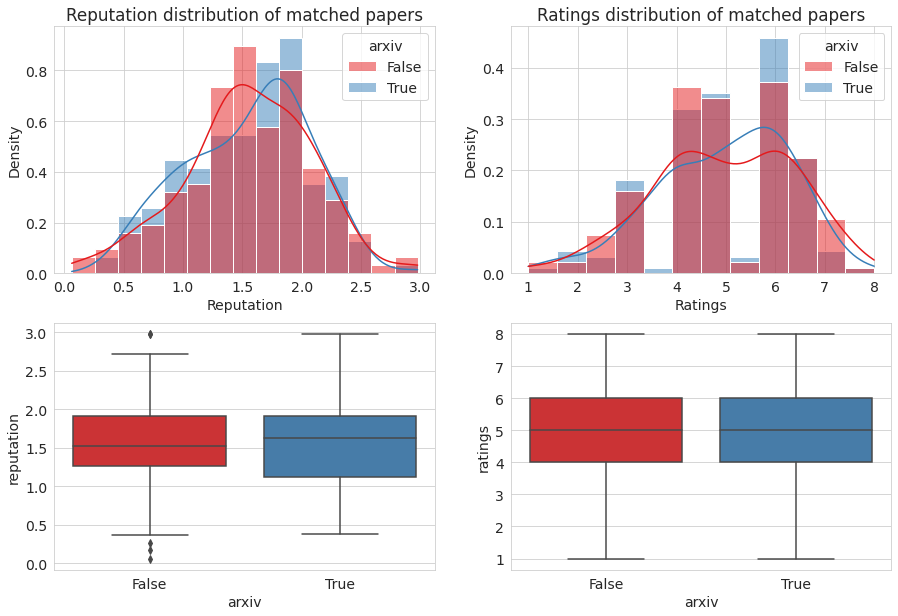

In [59]:
plot_post_matching_distributions(matched_data_top)

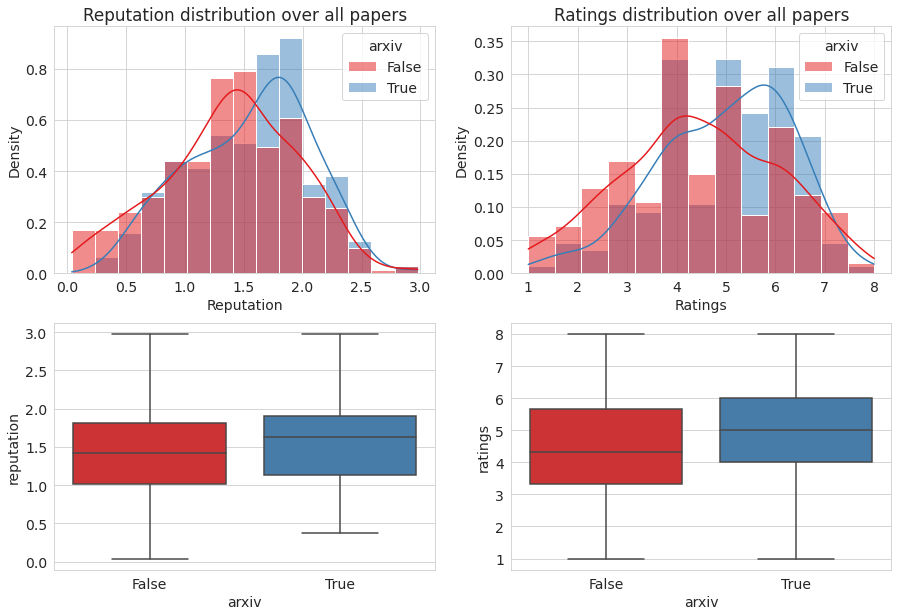

In [60]:
plot_pre_matching_distributions(data_2020_top)

Again, the matching seems to have done a nice job. It is slightly worse than the previous matching (especially for the reputation variable) but considering the limited amount of samples, we believe it is sufficient.

In [61]:
decisions_top = decisions_from_matching(data_2020_top, matching_top)
lo,hi = bootstrap_CI(decisions_top, func=compute_ate)
print(f"The average treatment effect is {compute_ate(decisions_top):.3f}. The 95% CI is [{lo:.3f},{hi:.3f}].")

The average treatment effect is 0.106. The 95% CI is [0.019,0.199].


#### Task 3.5.2
It looks like pre-printing does break double-blind submissions after all !

---